In [116]:
from lmfit import Model
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [117]:
t0=0
T=120
national_data=pd.read_csv('..\data\dati-andamento-nazionale\dpc-covid19-ita-andamento-nazionale.csv')
new_pos=national_data['nuovi_positivi'].values[t0:T]

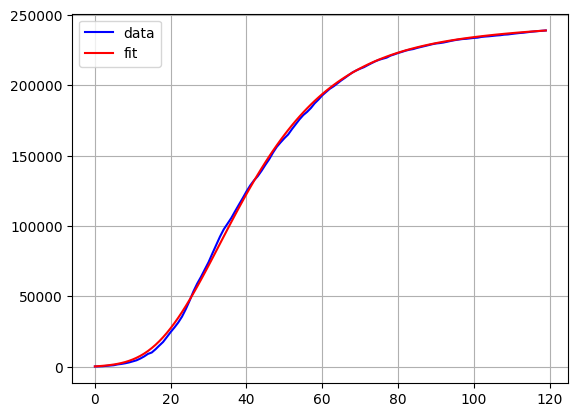

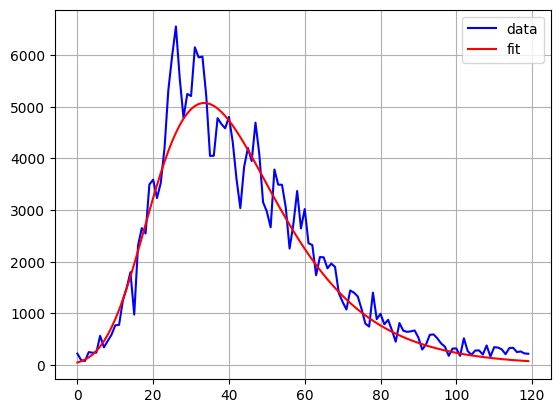

239111.0
239111


In [118]:
cum_pos=np.cumsum(new_pos)
d0=cum_pos[0]

# Define the Richardson bell curve function
def richardson(t, K, r, tm, nu):
    return np.int32(r*K*np.exp(-r*(t-tm))/((1+np.exp(-r*(t-tm)))**(1/nu)*(1+np.exp(-r*(t-tm)))))

# Fit on the S curve
def cum_richardson(t, K, r, tm, nu, d):
    return np.cumsum(richardson(t, K, r, tm, nu)) + d + (cum_pos[-1]-d-np.cumsum(richardson(t, K, r, tm, nu))[-1])/(t[-1]-t[0])*(t-t[0])

t= np.arange(t0,T)

# create model
fmodel = Model(cum_richardson)
# create parameters -- these are named from the function arguments --
# giving initial values
params = fmodel.make_params(K=5.68845650e+09,  r=6.10297694e-02, tm=-1.32496724e+02,  nu=4.13305862e-05, d=d0)
fmodel.set_param_hint('K',min=0)
fmodel.set_param_hint('r', min=0)
fmodel.set_param_hint('nu', min=0)

# fix d:
params['d'].vary = False

# fit the model
result = fmodel.fit(cum_pos, params, t=t)
sigma = result.eval_uncertainty()

plt.figure()
plt.plot(t, cum_pos, 'b-', label='data')
plt.plot(t, result.best_fit, 'r-', label='fit')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(t, new_pos, 'b-', label='data')
plt.plot(t, richardson(t, result.params['K'].value, result.params['r'].value, result.params['tm'].value, result.params['nu'].value), 'r-', label='fit')
plt.legend()
plt.grid(True)
plt.show()

print(result.best_fit[-1])
print(cum_pos[-1])
